<h1 style='color: green; font-size: 26px; font-weight: bold;'> 3. Previsão de falha <h1>

### Esta etapa foi dividida em 2 notebooks, devido a complexidade apresentada do problema.
Neste notebook, está toda a parte de:
 1. Pré Processamento Inicial
2. EDA
3. Conclusões
No notebook 2, constará a continuidade com: Pré Processamento II, Feature engineering, Modelagem, Avaliação, Modelo final e Conclusão.

<strong>Descripción</strong>
<p>Los galpones de Full de mercado libre cuentan con una flota de dispositivos que transmiten
diariamente telemetría agregada en varios atributos.
Las técnicas de mantenimiento predictivo están diseñadas para ayudar a determinar la
condición del equipo de mantenimiento en servicio para predecir cuándo se debe realizar el
mantenimiento. Este enfoque promete ahorros de costos sobre el mantenimiento preventivo
de rutina o basado en el tiempo porque las tareas se realizan solo cuando están justificadas.
</p>

<strong>Entregable</strong>
<p>Tiene la tarea de generar una Jupyter notebook con un modelo predictivo para predecir la
probabilidad de falla del dispositivo con el objetivo de bajar los costos del proceso. Como
una referencia, una falla de un dispositivo tiene un costo de 1 mientras el costo de un
mantenimiento es 0,5. El archivo "full_devices.csv" tiene los valores diários para los 9
atributos de los dispositivos y la columna que está tratando de predecir se llama 'failure' con
el valor binario 0 para no fallar y 1 para fallar
</p>

In [194]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [195]:
dir_data = "F:\PycharmProjects\DesaioMELI\data"
df = pd.read_csv(dir_data+r'\full_devices.csv', sep=',', encoding='ISO-8859-1').reset_index()
df.head()

,index,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


# Pré processamento I

In [196]:
df.describe()

,index,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,62246.500000,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,35938.466544,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,31123.250000,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,62246.500000,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,93369.750000,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,124493.000000,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [197]:
print("Data máx",df.date.max())
print("Data min",df.date.min())

Data máx 2015-11-02
Data min 2015-01-01


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   index       124494 non-null  int64 
 1   date        124494 non-null  object
 2   device      124494 non-null  object
 3   failure     124494 non-null  int64 
 4   attribute1  124494 non-null  int64 
 5   attribute2  124494 non-null  int64 
 6   attribute3  124494 non-null  int64 
 7   attribute4  124494 non-null  int64 
 8   attribute5  124494 non-null  int64 
 9   attribute6  124494 non-null  int64 
 10  attribute7  124494 non-null  int64 
 11  attribute8  124494 non-null  int64 
 12  attribute9  124494 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 12.3+ MB


In [199]:
#Tranformando os tipos de dados
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 124494 entries, 0 to 124493
Series name: date
Non-Null Count   Dtype         
--------------   -----         
124494 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 972.7 KB


In [200]:
#dispositivos
print(df.shape)

(124494, 13)


In [201]:
#Dados unicos e quantidades
def unique_data(df):
    """" Verificação dos dados unicos e da quantidade de registros para cada um """
    column_info = {}
    for col in df.columns:
        unique_values = df[col].unique()
        value_counts = []
        for value in unique_values:
            count = df[df[col] == value][col].count()
            value_counts.append(count)
        column_info[col] = {"unique_values": unique_values, "value_counts": value_counts}
    return column_info

unique_values = pd.DataFrame(unique_data(df))
# qtde de registros unicos para cada coluna
for col in df.columns:
    print("Coluna {}: {}".format(col, len(df[col].unique())))

Coluna index: 124494
Coluna date: 304
Coluna device: 1169
Coluna failure: 2
Coluna attribute1: 123877
Coluna attribute2: 558
Coluna attribute3: 47
Coluna attribute4: 115
Coluna attribute5: 60
Coluna attribute6: 44838
Coluna attribute7: 28
Coluna attribute8: 28
Coluna attribute9: 65


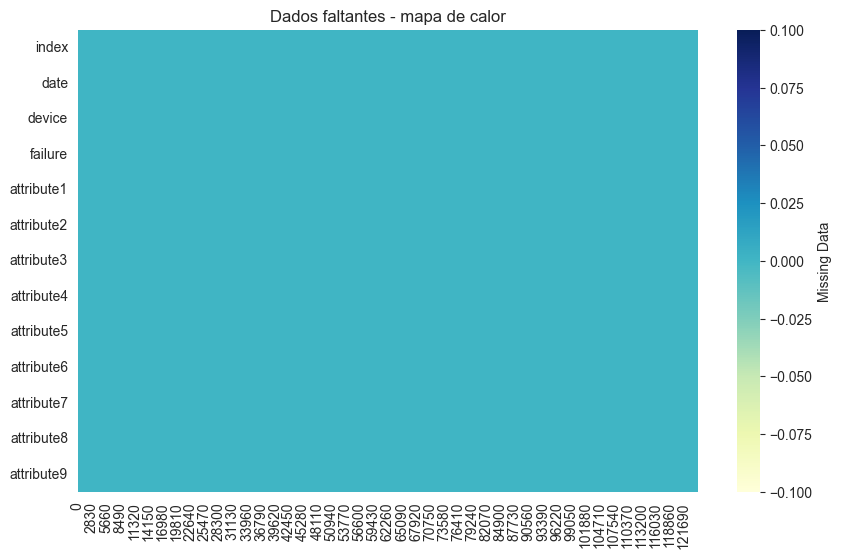

<Figure size 1000x600 with 0 Axes>

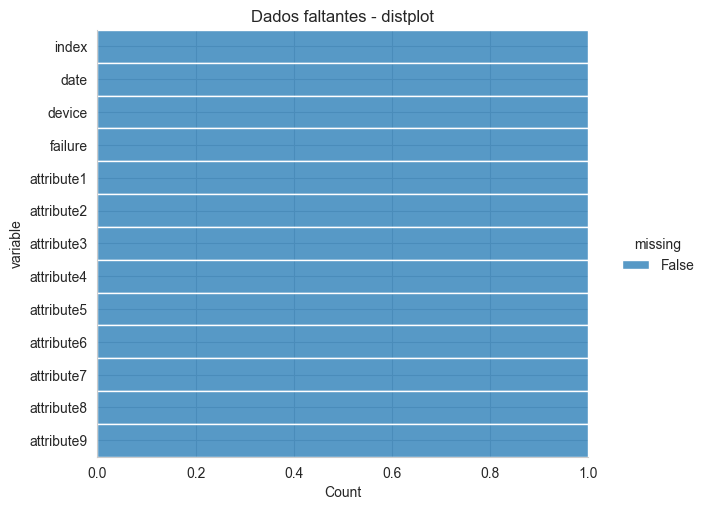

In [202]:
def plot_missing_values():
    #mapa de calor
    ax1 = plt.figure(figsize=(10,6))
    sns.heatmap((df.isna() + df.isin(['none'])).transpose(),
                cmap="YlGnBu",
                cbar_kws={'label': 'Missing Data'})
    plt.title("Dados faltantes - mapa de calor")
    plt.savefig("missing_value_heatmap_3.png", dpi=100)

    #distribuição
    ax2 = plt.figure(figsize=(10,6))
    sns.displot(
        data=(df.isna() + df.isin(['none'])).melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    plt.title("Dados faltantes - distplot")
    plt.savefig("/missing_values_distplot_3.png", dpi=100)
plot_missing_values()


In [203]:
df.duplicated().sum()

0

In [204]:
df.device.duplicated().sum()

123325

É normal ter dados duplicados, já que são dados de telemetria para dispositivos com falha e sem falha.

# EDA I

<strong>No histograma, verifica-se graficamente a representação da dispersão dos dados,assim como a moda, sendo os picos do histograma.</strong>

 Os atributos 3,4,7,8,9 apresentam comportamento enviesado a direita, é valido avaliar a correlação delas.
 A quantidade de amostras diminui ao longo do tempo, isso vai afetar na generalização do modelo, será mais explorada para adaptar a modelagem para a composição das amostras.
  O atributo1 apresenta uma distribuição uniforme discreta, então todos os seus valores têm a mesma probabilidade de ocorrer. Será necessário avaliar essa distribuição dos dados com mais detalhes e a importância da variavél.
 O atributo5 mostra assimetria a direita, ou seja, existe pico de valores mas a maioria dos dados estão à direita do pico.
 O atributo6 tem a densidade a


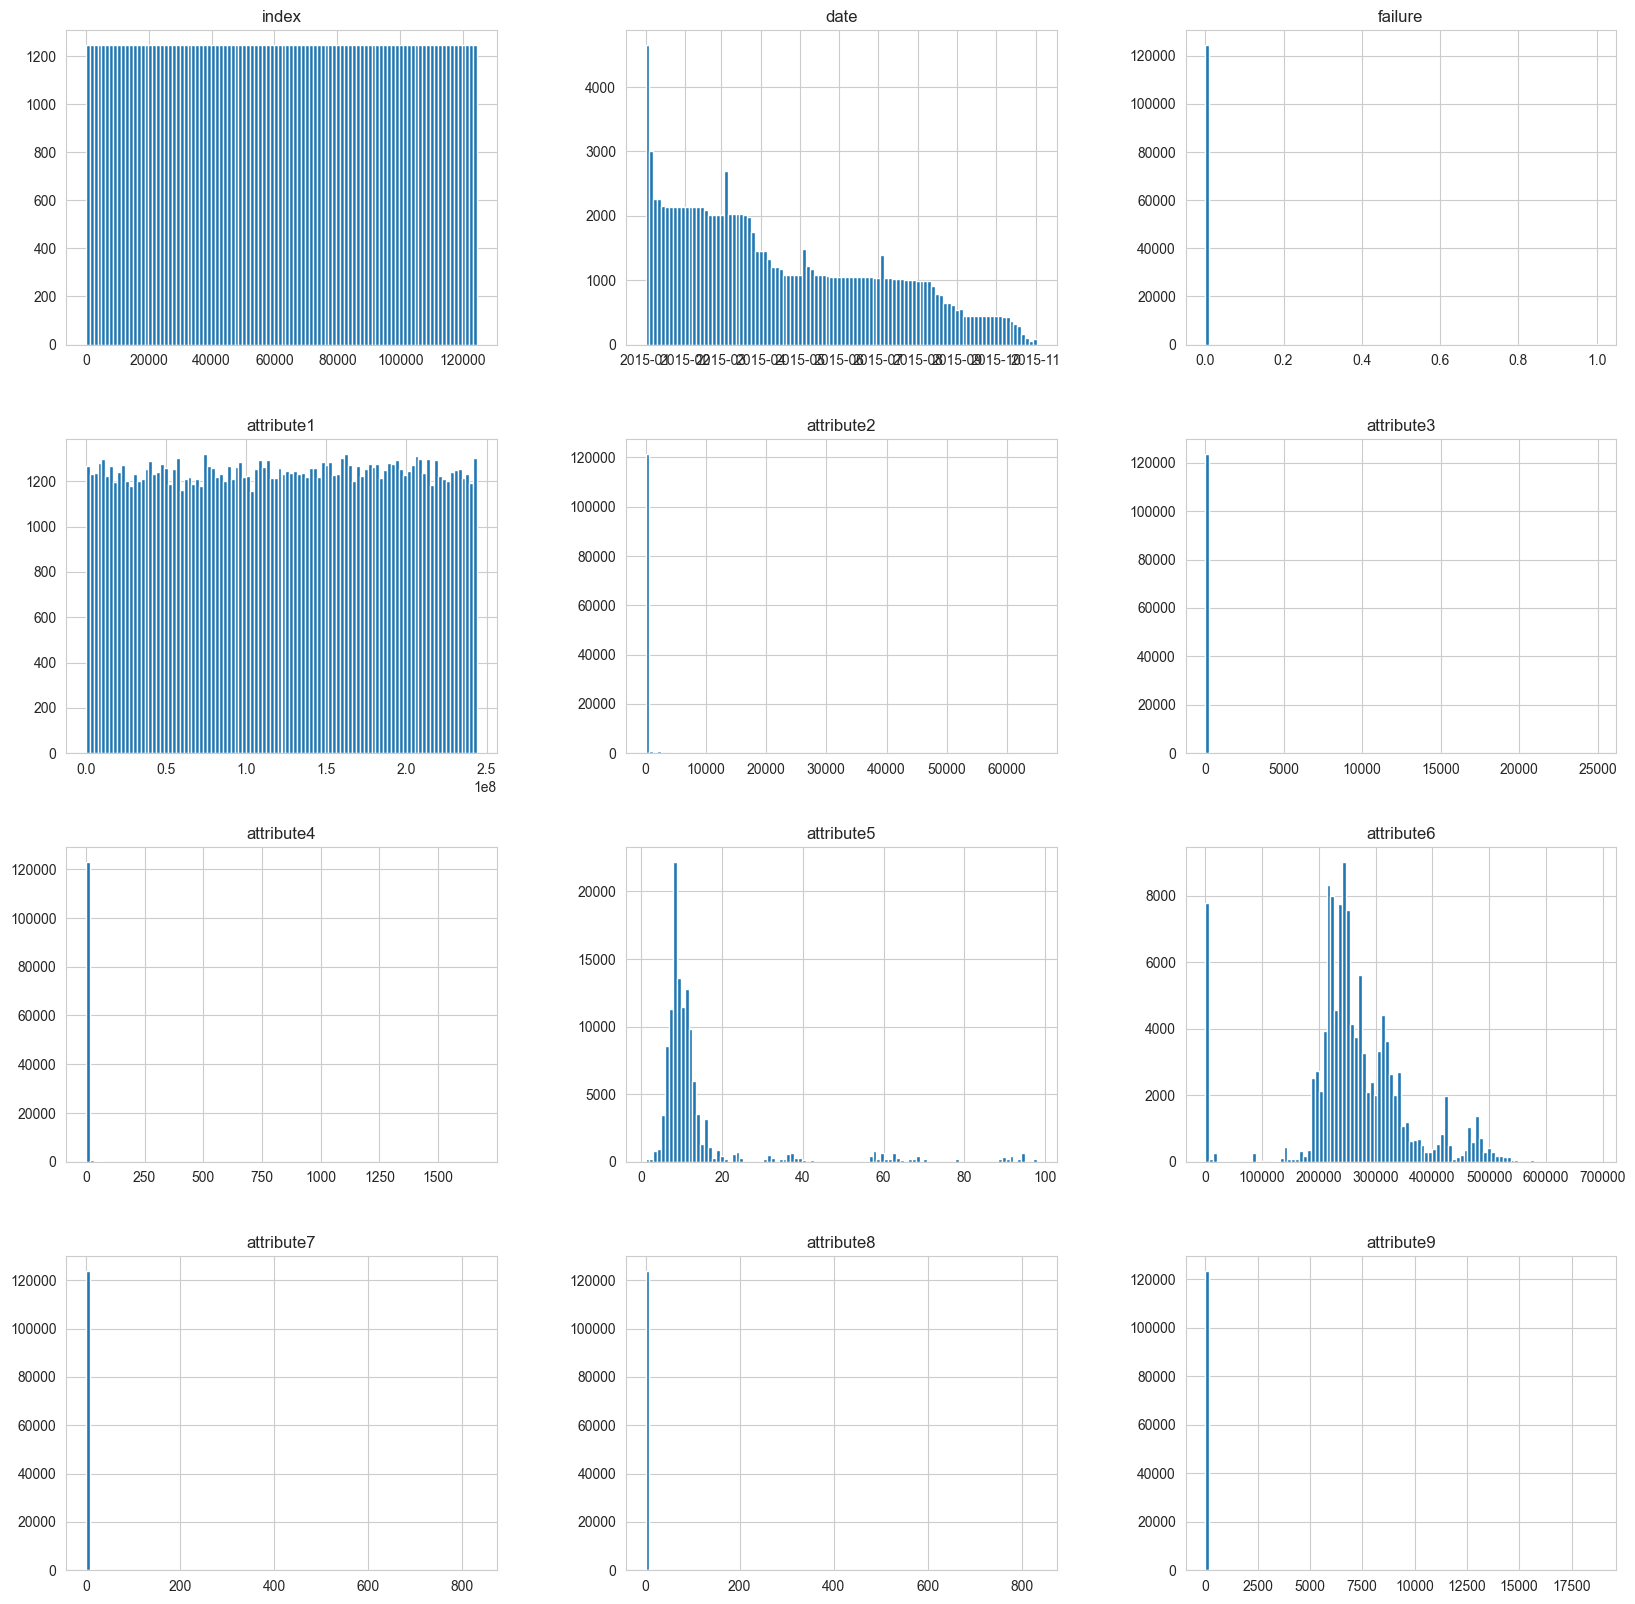

In [345]:
ax = df.hist(bins=100, figsize=(20,20))

<strong>Avaliação da variavél attribute1</strong>

In [262]:
#Avaliação da variavél attribute1
print('Attribute1 min',df['attribute1'].min())
print('Attribute1 máx',df['attribute1'].max())
print('Attribute1 média',df['attribute1'].mean())
print('Attribute1 mediana',df['attribute1'].median())
print('Attribute1 desvio padrão',df['attribute1'].std())


Attribute1 min 0
Attribute1 máx 244140480
Attribute1 média 122388103.24212413
Attribute1 mediana 122797388.0
Attribute1 desvio padrão 70459334.21635978


In [342]:
# Cálculo do desvio padrão
desvio_padrao = df.std()
desvio_padrao

C:\Users\barba\AppData\Local\Temp\ipykernel_12352\3137310322.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  desvio_padrao = df.std()


index                       35938.466544
date          78 days 09:53:22.062814279
failure                         0.029167
attribute1                70459334.21636
attribute2                    2179.65773
attribute3                    185.747321
attribute4                     22.908507
attribute5                     15.943028
attribute6                  99151.078547
attribute7                      7.436924
attribute8                      7.436924
attribute9                    191.425623
dtype: object

Nota-se que o dp para as colunas attribute7 e attribute8 são baixos em relação as demais, reforçando o comportamento de enviezamento, já para as colunas attribute4 e attribute5 os desvios são o dobro, indicando uma dispersão a maior ao redor da média, já para as demais colunas de atributos, os dps são bem altos, indicando alta dispersão dos dados.

In [263]:
df[['attribute1']].value_counts()

attribute1
165048912     26
57192360      26
89196552      26
169490248     23
169467344     15
              ..
81933936       1
81932592       1
81928568       1
81922616       1
244140480      1
Length: 123877, dtype: int64

In [363]:
df[['attribute9']].value_counts()

attribute9
0             97358
1              9436
2              3722
3              2327
4              1396
              ...  
18701             5
10137             4
30                3
38                3
2269              1
Length: 65, dtype: int64

Os dados são bem dispersos, após a avaliação da importância irei tomar a decisão: descarte, tranformação discreta de quantil ou manter da forma como está.

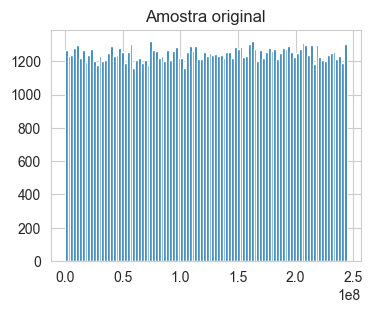

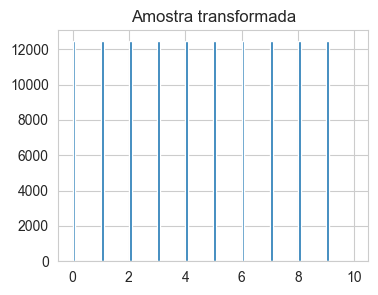

In [267]:

# Calcular os quantis dos valores da amostra
amostra = df['attribute1']
quantis_amostra = np.percentile(amostra, np.linspace(0, 100, 11))

# Aplicar a transformação discreta de quantil
amostra_transformada = np.digitize(amostra, quantis_amostra) - 1

ax = plt.figure(figsize=(4,3))
plt.hist(amostra, bins=100)
plt.title('Amostra original')
plt.show()

ax = plt.figure(figsize=(4,3))
plt.hist(amostra_transformada, bins=100)
plt.title('Amostra transformada')
plt.show()

<strong>Investigando com mais detalha a assimetria</strong>

 o coeficiente de assimetria é a média menos a moda, dividida pelo desvio padrão.
 '+' assimetria à direita
 '-' assimetria à esquerda
 '0' distribuição simétrica

In [272]:
from scipy.stats import skew

#coeficiente de assimetria para validar a distribuição obeservada no histograma
# Cálculo do coeficiente de assimetria para cada coluna
skewness = df.skew()
print("Coeficiente de assimetria")
print(skewness)

Coeficiente de assimetria
index          0.000000
failure       34.227194
attribute1    -0.011143
attribute2    23.857923
attribute3    82.712278
attribute4    41.502611
attribute5     3.483679
attribute6    -0.375285
attribute7    73.476456
attribute8    73.476456
attribute9    49.899278
dtype: float64


C:\Users\barba\AppData\Local\Temp\ipykernel_12352\1550242531.py:5: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


Confirmada a distribuição assimetrica para o attribute5.
Attribute6 apresentou distribuição aproximadamente assimétrica

<strong>Aplicando teste de Shapiro-Wilk e Kolmogorov-Smirnov para verificar a normalidade</strong>

H0 - distribuição considerada normal
HA - distribuição não é considerada normal

*stat mede o quão distante a distribuição dos dados está de uma distribuição normal.
Quanto mais próximo de 1, mais normal é a distribuição.
*p-value pode não ser tão preciso com shapiro, devido ao tamanho da amostra

F:\PycharmProjects\DesaioMELI\meli\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Estatística do teste=0.897, valor-p=0.0000000000
A amostra não parece seguir uma distribuição normal

Estatística de teste: 0.9999999999999993
P-valor: 0.0


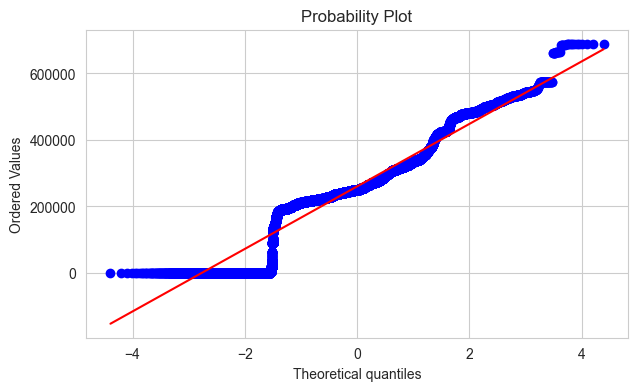

In [290]:
from scipy.stats import shapiro, kstest, norm, probplot
from scipy import stats
#teste de Shapiro-Wilk para Attibute6
stat, p = shapiro(df['attribute6'])

# imprimir o valor do teste estatístico e o valor-p
print('Estatística do teste=%.3f, valor-p=%.10f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('A amostra parece seguir uma distribuição normal')
else:
    print('A amostra não parece seguir uma distribuição normal')

# teste de Kolmogorov-Smirnov
stat_k, p_k = kstest(df['attribute6'], norm.cdf)
print('\nEstatística de teste:', stat_k)
print('P-valor:', p_k)

#Gráfico Q-Q
fig = plt.figure(figsize=(7,4))
res = stats.probplot(df['attribute6'], plot=plt)
plt.show()

Com os testes e o gráfico Q-Q plot, é reforçado um comportamento observado no histograma, uma protuberância em 0, e uma segunda distribuição, aparentemente próxima da normal, sendo na verdade um comportamento de assimetria.

Neste caso, é possivél avaliar se a tranformação dos dados é aceitavél, para normaliza-los.

boxplot

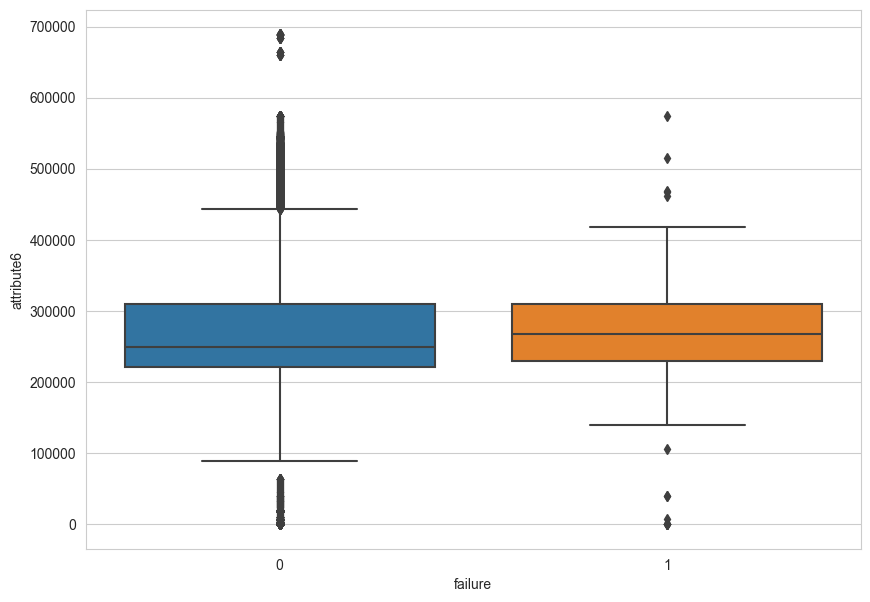

In [328]:
plt.figure(figsize=(10,7))
sns.boxplot(x= 'failure',y='attribute6',data=df)
plt.show()

In [343]:
# Percentil
percentil = np.around(df.describe(), decimals=2)[3:]
percentil

,index,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
min,0.00,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0
25%,31123.25,0.0,61284762.0,0.0,0.0,0.0,8.0,221452.0,0.0,0.0,0.0
50%,62246.50,0.0,122797388.0,0.0,0.0,0.0,10.0,249799.5,0.0,0.0,0.0
75%,93369.75,0.0,183309640.0,0.0,0.0,0.0,12.0,310266.0,0.0,0.0,0.0
max,124493.00,1.0,244140480.0,64968.0,24929.0,1666.0,98.0,689161.0,832.0,832.0,18701.0


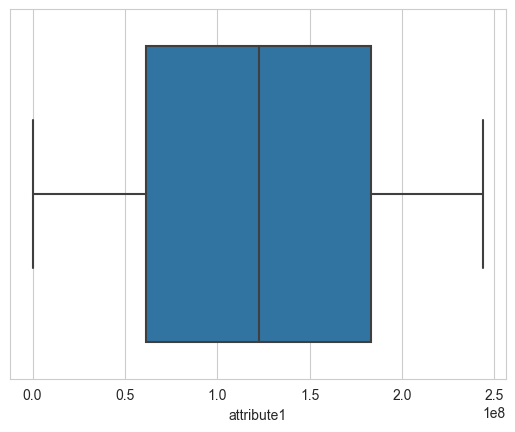

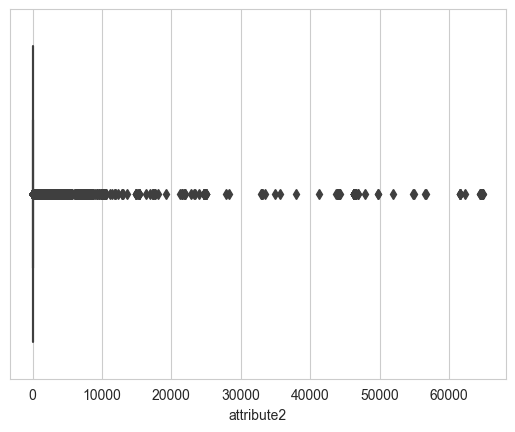

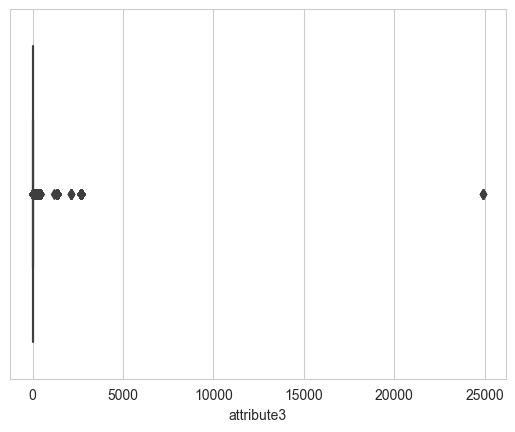

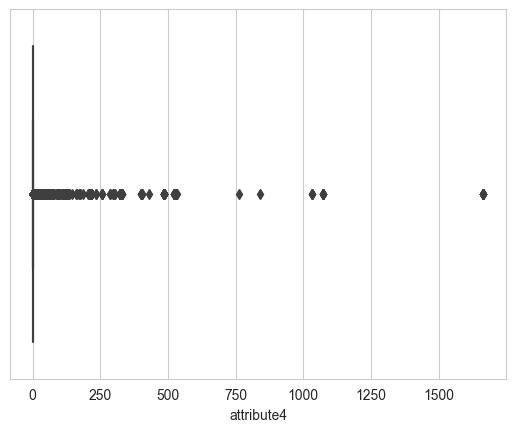

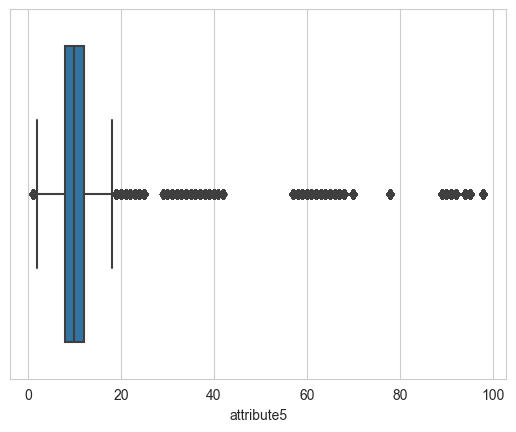

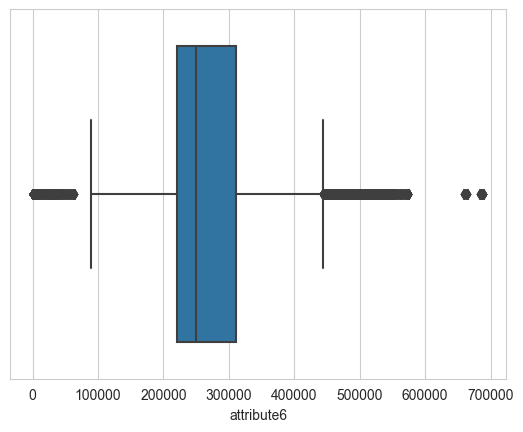

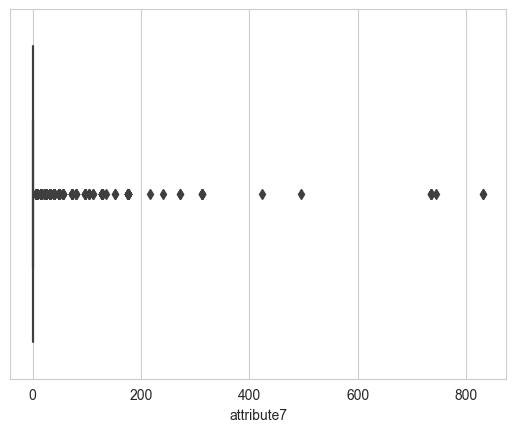

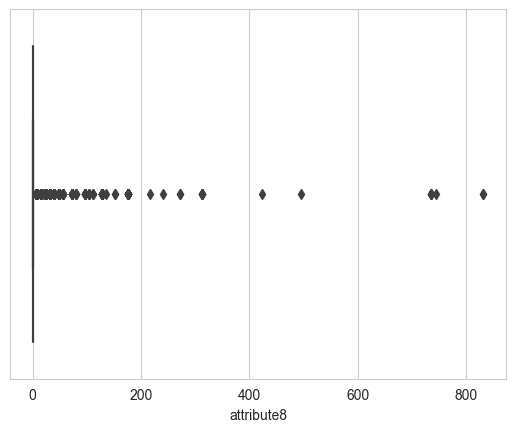

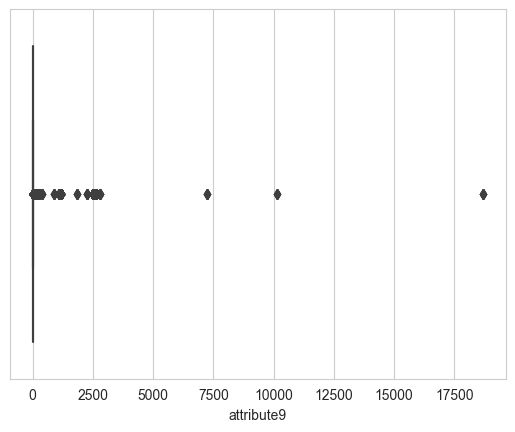

In [366]:
sns.boxplot(x=df['attribute1'])
plt.show()
sns.boxplot(x=df['attribute2'])
plt.show()
sns.boxplot(x=df['attribute3'])
plt.show()
sns.boxplot(x=df['attribute4'])
plt.show()
sns.boxplot(x=df['attribute5'])
plt.show()
sns.boxplot(x=df['attribute6'])
plt.show()
sns.boxplot(x=df['attribute7'])
plt.show()
sns.boxplot(x=df['attribute8'])
plt.show()
sns.boxplot(x=df['attribute9'])
plt.show()

Observa-se que a maior parte dos dados está no Q3 para não falha e no Q2 para falha, além disso, observando o boxplot da coluna attribute6, aparenta um comportamento de outliers, etntrepando, não é esse o caso, a base não contava com valores faltantes e a distribuição dos valores é bastante dispesa, como visto pelo histograma e o desvio padrão, além dessas qauntidade acima de Q3 e abaixo de Q1 serem altas. Portando não seria prudente retirar esses registros do conjunto, pois estão em quantidade representativa da telemetria e, retirá-los, pode afetar o resultado do modelo significativamente.
Para a coluna attribute1, os
Para os dem

<strong>Análise de correlação da variavéis numericas</strong>

C:\Users\barba\AppData\Local\Temp\ipykernel_12352\104777036.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


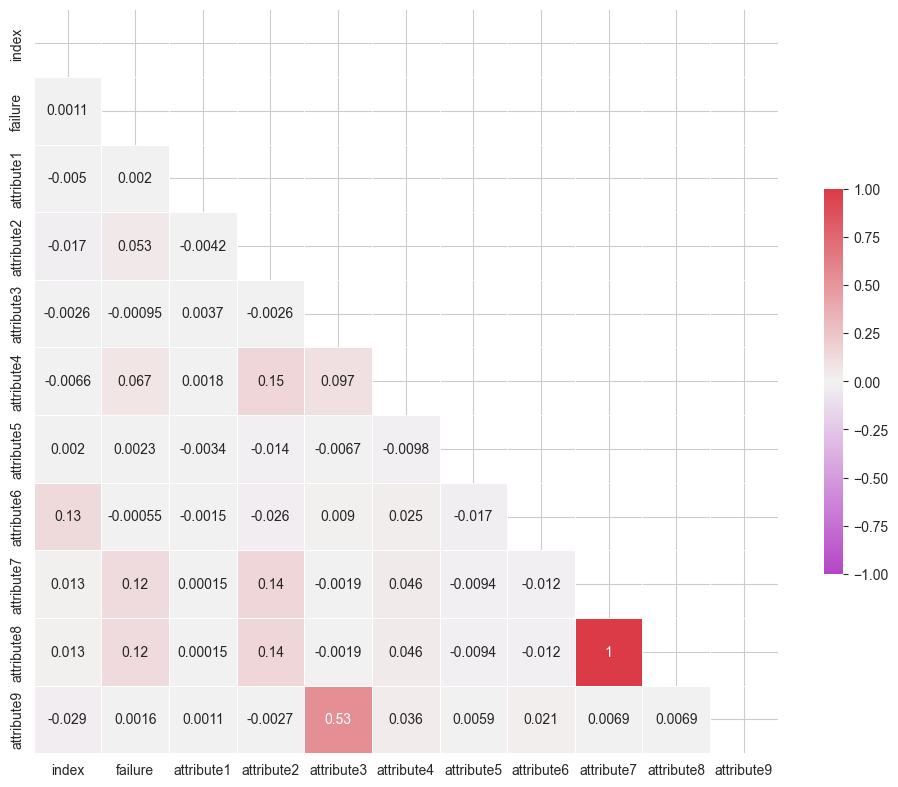

In [206]:

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(300, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [207]:
df.sample(5)

,index,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
113757,113757,2015-08-16,Z1F1B799,0,87095304,0,0,0,16,55,0,0,0
14265,14265,2015-01-16,Z1F0MCCA,0,14390368,0,0,0,12,325969,0,0,0
111484,111484,2015-08-09,S1F13KBZ,0,226886608,0,0,0,11,249465,0,0,0
35163,35163,2015-02-15,S1F0SBBW,0,120887872,0,0,0,11,208433,0,0,0
100780,100780,2015-07-08,W1F0KG97,0,177984760,0,0,0,68,250944,0,0,0


In [208]:
df_test_descart = df[df['attribute7'] != df['attribute8']]
df_test_descart.shape

(0, 13)

In [209]:
unique_values[['attribute7','attribute8']]

,attribute7,attribute8
unique_values,"[0, 16, 8, 48, 32, 312, 6, 24, 40, 56, 96, 112...","[0, 16, 8, 48, 32, 312, 6, 24, 40, 56, 96, 112..."
value_counts,"[123036, 397, 793, 36, 35, 5, 13, 65, 20, 6, 7...","[123036, 397, 793, 36, 35, 5, 13, 65, 20, 6, 7..."


<strong> Analisando o heatmap com as correlações e investigando mais a fundo com os valores das colunas e suas respectivas quantidades, além de verificar a ocorrencia de valores diferentes nas colunas nos mesmos registros, verifica-se que os valores para as colunas 'attribute7' e 'attribute8' são os mesmos, então posso descartar uma delas.</strong>

Nenhuma das colunas apresentou correlação forte ou fraca diretamente com a coluna failure, isso é um indicativo que nenhuma atua com influência direta para essa previsão, deixando subentendido que a previsão pode ser feita somente com a combinação das colunas. A única que apresentou uma correlação bem fraca foi a coluna attribute6.

Entre as colunas que serão usadas como feautures, as attribute 3 e attribute9 apresentaram uma correlação moderada, mas ainda não é aceitavém se uma influência diretamente na outra.


In [211]:
#proporção de falha
def plot_failure(data, title):
    #graf config
    fig = plt.gcf()
    ax = fig.set_size_inches( 10, 6)
    ax = sns.countplot(data=data, x="failure")

    # Definindo as etiquetas dos eixos
    plt.xticks(rotation=45)
    plt.xlabel('failure')
    plt.ylabel('count')
    ax.set_title(title)
    plt.savefig(title+".png", dpi=100)

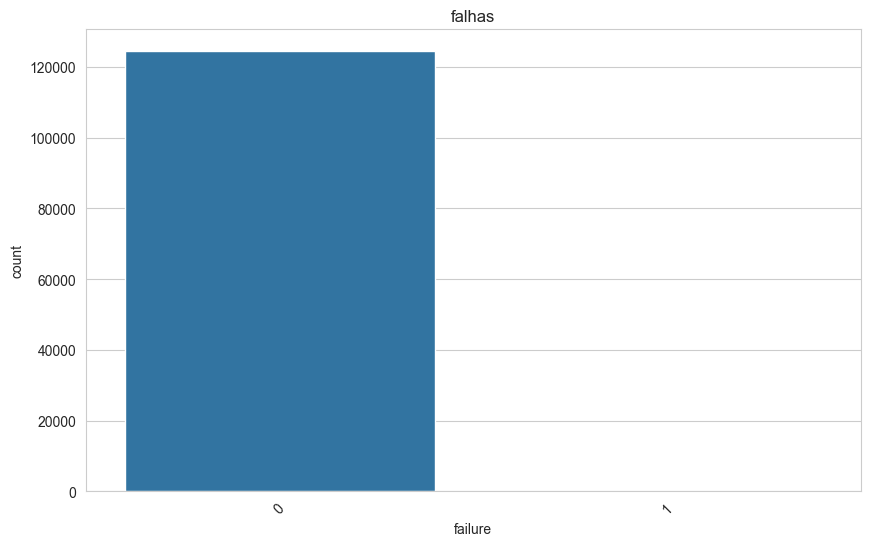

In [212]:
#falhas dataset completo
plot_failure(df, 'falhas')

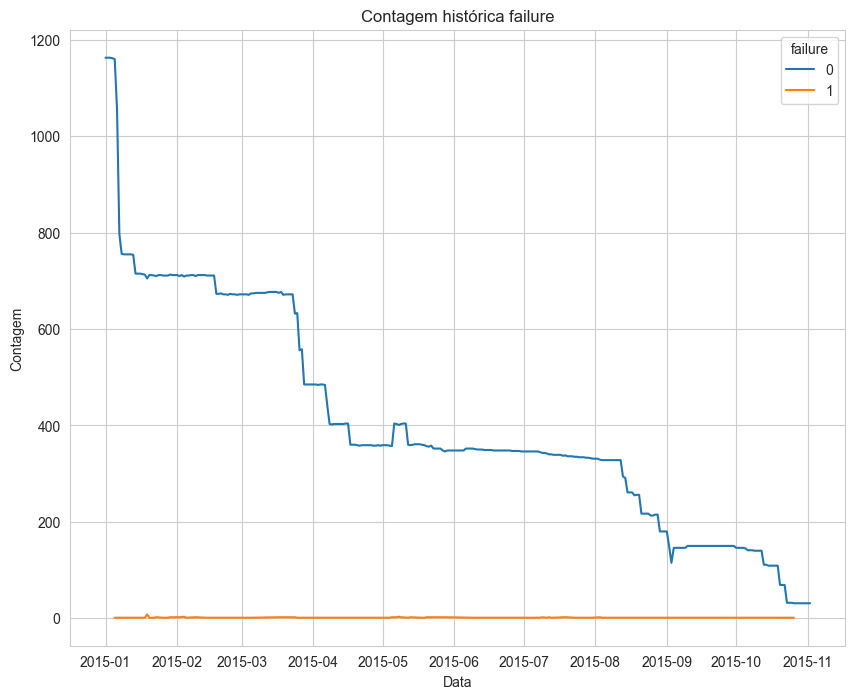

In [410]:
def plot_timeseries(data, col_groupby):

    grouped = data.groupby(['date', col_groupby])
    # Obter contagem total por data e classe de falha
    count_data = grouped.size().reset_index(name='count')

    #graf config
    fig, ax = plt.subplots(figsize=(10, 8))

    # Criar lineplot da contagem total
    sns.lineplot(ax=ax, data=count_data, x='date', y='count', hue=col_groupby, legend='full')
    ax.set_title('Contagem histórica ' + col_groupby)
    ax.set_xlabel('Data')
    ax.set_ylabel('Contagem')
    plt.savefig("historico_falhas.png", dpi=100)
    plt.show()
plot_timeseries(df, 'failure')

In [214]:
historic_grouped = df.groupby(['date', 'failure'])
historic_grouped.size().reset_index(name='count')

,date,failure,count
0,2015-01-01,0,1163
1,2015-01-02,0,1163
2,2015-01-03,0,1163
3,2015-01-04,0,1162
4,2015-01-05,0,1160
...,...,...,...
375,2015-10-27,0,31
376,2015-10-29,0,31
377,2015-10-30,0,31
378,2015-10-31,0,31


In [215]:
df['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

Classe desbalanceada, vou utilizar Sobreamostragem para os algoritmos que não sejam preparados para lidar com esse cenário, para evitar que seja tendêncioso e de previsão incorreta para possivéis falhas.

#### verificando dispositivos com que tiveram falha em algum momento

In [216]:
# df.groupby('device')['failure'].value_counts()

In [217]:
# Filtra registros dos dispositivos que tiveram falha em algum momento
all_failed_devices = df.loc[df['device'].isin(df.loc[df['failure'] == 1, 'device'].unique())]
all_failed_devices.shape

(10713, 13)

In [218]:
all_failed_devices.groupby('failure')['device'].count()

failure
0    10607
1      106
Name: device, dtype: int64

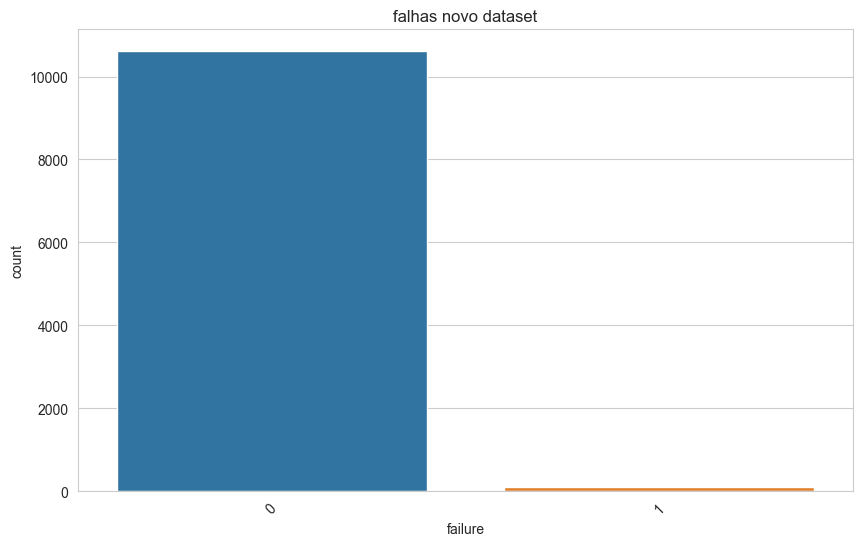

In [219]:
#proporção de falha
plot_failure(all_failed_devices,'falhas novo dataset')

Talvez eu use esse novo dataset 'all_failed_devices' e faça o balanceamento nele, dependendo dos resultados obtidos.

<strong>Mais detalhes das colunas 'attribute3', 'attribute9'</strong>

In [372]:
unique_values[['attribute3', 'attribute9']]

,attribute3,attribute9
unique_values,"[0, 3, 1, 323, 266, 2, 14, 9, 24929, 382, 1326...","[7, 0, 3, 1, 164, 8, 2269, 21, 5, 2, 145, 1013..."
value_counts,"[115359, 113, 3274, 6, 6, 749, 12, 262, 4, 5, ...","[774, 97358, 2327, 9436, 6, 733, 1, 19, 735, 3..."


In [401]:
# plotagem para colunas attribute3 e attribute9 com todo o dataset e com o dataset só com os dispositivos que alguma vez apresentaram falha
def plot_scatter_graph(x, y,  data):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=data,
                    x=x,
                    y=y,
                    hue='failure',
                    hue_order=[1, 0],
                    style='failure',
                    s=30,
                    palette=['#0F68C1', '#BEC0C1'],
                    alpha=0.8)
    plt.legend(labels=['Não falhou', 'Falhou'], fontsize=15)
    return plt.show()

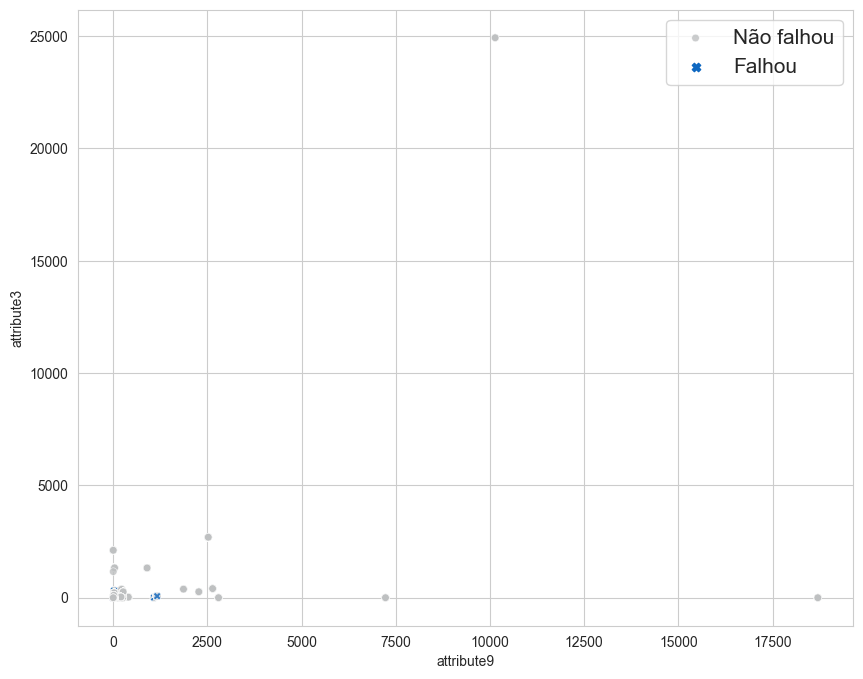

In [400]:
# Scatter plot dataset full
plot_scatter_graph('attribute9', 'attribute3', df)

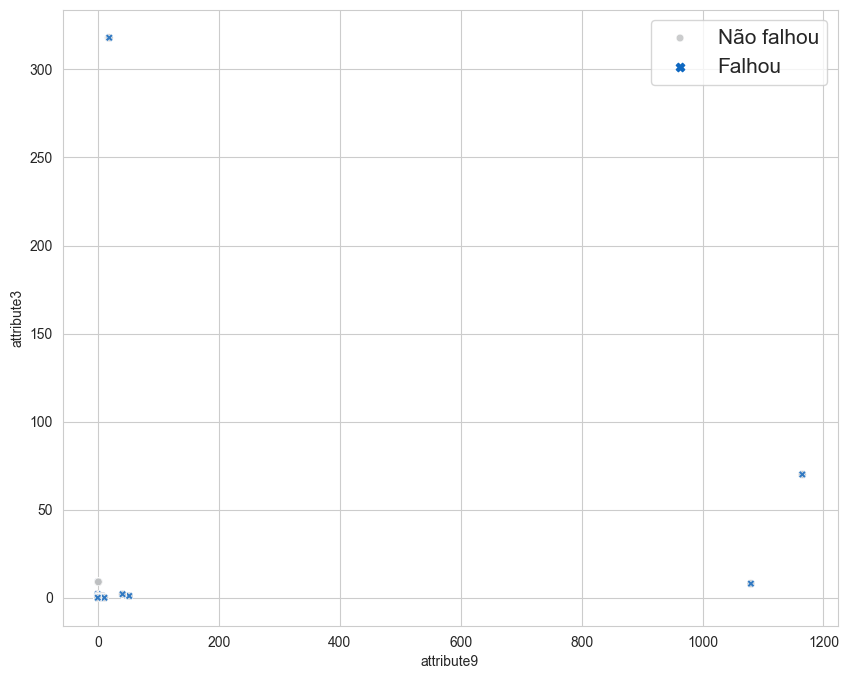

In [402]:
# Scatter plot dataset full
plot_scatter_graph('attribute9', 'attribute3', all_failed_devices)

No dataset completo, os dados ficam mais distribuidos entre 0 e 2500 para o attributo9 e entre 0 e 4600 para attribute3, incluindo quando constata falha.
Já no dataset com os dispositivos que falharam alguma vez, a maior parte dos valores está entre 0 e 200 para attribute9 e entre 0 e 40 para attribute3.
Entretanto, existem valores bem maiores indicando falha, fora desses intervalos, considerando a pouca ocorrência desse evento no dataset, isso não pode ser desconsiderado.
Apesar disso, o comportamento, comparando essa amostra do dataset( só com os dispositivos que alguma vez falharam) com o dataset todo, fica nitida a mudança na escala dessas duas colunas, aparentemente, esses valores são menores nos dispositivos que alguma vez apresentaram falha e maiores, mas não diminuem na mesma proporção, aparenta ser mais perceptível no attributo9.

<strong> Analisando dados quando consta falha</strong>

In [298]:
#Comportamento histórico - registros por meses

df['month'] = df['date'].dt.to_period('M')
grouped = df.groupby(['month', 'failure']).size()

# Criar uma tabela pivot com a contagem de falhas e não falhas em cada mês
pivot_table = pd.pivot_table(df, values='device', index='month', columns='failure', aggfunc='count')
pivot_table.columns = ['non_failure', 'failure']
pivot_table['% failure'] = (pivot_table['failure'] / pivot_table['non_failure'] * 100)
pivot_table


,non_failure,failure,% failure
month,,,
2015-01,25008.0,24.0,0.095969
2015-02,19486.0,14.0,0.071846
2015-03,19824.0,9.0,0.045400
2015-04,12003.0,9.0,0.074981
2015-05,11309.0,21.0,0.185693
2015-06,10463.0,6.0,0.057345
2015-07,10515.0,16.0,0.152164
2015-08,8342.0,4.0,0.047950
2015-09,4470.0,NaN,NaN


In [333]:
print('Percentual de falha: {:.2f}%'.format(pivot_table['% failure'].sum()))

Percentual de falha: 0.83%


Além do desbalanceamento, o tamanho da amostra decai mês a mês, talvez precise treinar um modelo para cada mês ou trimestre. Para cada mês, excluria outubro e novembro, por não terem registro de falha, no caso do trimestre, excluiria o último, para evitar overfitting. Para as demais colunas, exceto a attribute1, os dados mostram novamente seu comportamento de dispersão, dispensando a possibilidade de descarte dessas colunas sem a avaliação de feauture no Aprendizado de máquina.

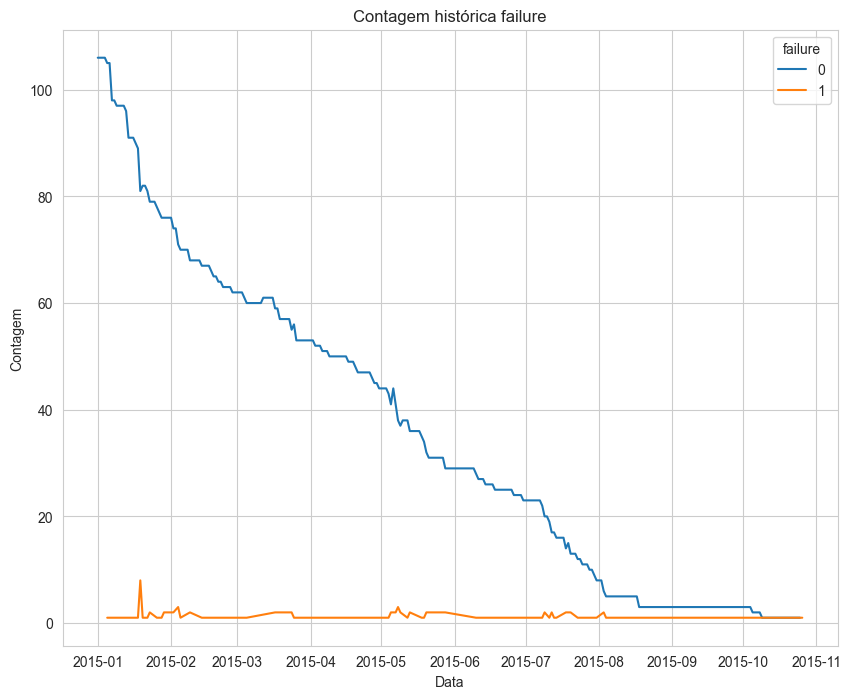

In [411]:
plot_timeseries(all_failed_devices, 'failure')

# Conclusões da Análise Exploratória de Dados

1. A base não apresenta dados faltantes e aparenta não ter outliers que não fazem parte do comportamento padrão de dispesão dos dados.
2. É preciso realizar o balanceamento dos dados - A técnica que vou utilizar inicialmente é a Oversample.
2. No geral, as colunas têm valores bem dispersos, algumas com comportamento assimetrico, outras enviezadas, uma com distribuição uniforme discreta e nenhuma com distribuição normal.
3. Existem três colunas que podem ser normalizadas e testadas no modelo.
4. Uma coluna pode ser descarta, por apresentar os mesmos dados nos mesmos instantes que outra coluna e apresentar correção perfeita positiva.
5. Duas colunas têm correlação média e aparentemente a variação de uma acompanha a variação da outra, descrescendo quando estão no grupo de dispositivos com defeito.
6. A quantidade de amostras decai ao longo dos meses, levantando a possibilidade de modelagem mensal para gerar um modelo de ML final que se adeque bem aos dados e tenha poder de generalização.
7. Tem os cenários para falha e não falha com valor target, então é possível  trabalhar com modelos supervisionados e semi supervisionados, com pipeline para testar mais de 1.